# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

### <span style="color:darkred">Módulo I - Dados Estruturados, Não Estruturados e problemas típicos em bases de dados</span>


## <span style="color:darkred">Avaliação</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos


---

#### <font color='red'> As respostas devem ser fornecidas no Moodle. Usar o notebook para a implementação dos códigos que fornecerão as respostas</font>

---

In [2]:
# carregando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("./dados/TACTD-01-Base.csv")

### Questão 1)

Considere a base de dados disponível em `TACTD-01-Base.csv`. Com relação aos dados faltantes no atributo 'Sex', i.e. linhas que não sejam 'F' nem 'M', podemos dizer que:
 
 (a) São do tipo completamente aleatório (MCAR)<br>
 (b) São do tipo (condicionalmente) aleatório (MAR)<br>
 (c) São do tipo não aleatório<br>
 (d) Não há dados faltantes<br> 

In [8]:
df.isnull().sum()

Name                   0
Sex                    6
Year of Birth          0
Country of Birth       0
Religion               4
City                   0
Profession             0
Years of Experience    9
dtype: int64

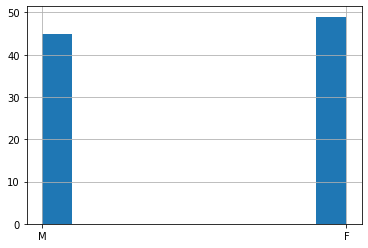

In [16]:
df['Sex'].hist()

In [14]:
df[df['Sex']=='M'].describe()

,Year of Birth,Years of Experience
count,45.000000,40.000000
mean,1978.111111,14.575000
std,11.770962,11.506715
min,1940.000000,0.000000
25%,1969.000000,5.000000
50%,1983.000000,12.000000
75%,1985.000000,20.250000
max,2010.000000,52.000000


In [15]:
df[df['Sex']=='F'].describe()

,Year of Birth,Years of Experience
count,49.000000,45.000000
mean,1974.408163,17.022222
std,8.765269,10.491314
min,1950.000000,3.000000
25%,1967.000000,9.000000
50%,1976.000000,18.000000
75%,1981.000000,22.000000
max,1988.000000,46.000000


In [13]:
df.describe()

,Year of Birth,Years of Experience
count,100.00000,91.000000
mean,1976.20000,15.780220
std,10.17424,10.725672
min,1940.00000,0.000000
25%,1969.00000,8.000000
50%,1978.00000,16.000000
75%,1984.00000,21.000000
max,2010.00000,52.000000


In [17]:
# seu código com análise do atributo Sex
df[df['Sex'].isnull()].describe()

,Year of Birth,Years of Experience
count,6.000000,6.000000
mean,1976.500000,14.500000
std,5.319774,6.473021
min,1972.000000,5.000000
25%,1973.000000,10.000000
50%,1974.500000,17.000000
75%,1978.250000,18.750000
max,1986.000000,21.000000


---

### Questão 2)

Considere a base de dados disponível em `TACTD-01-Base.csv`, e analise os dados no atributo 'Religion'. Esse atributo possui os seguintes problemas:

 (a) 9 dados faltantes (sendo desses 5 dados errôneos) e 1 outlier<br>
 (b) 4 dados faltantes devido a omissão do usuário<br>
 (c) 9 dados errôneos, sendo desses 2 outliers<br>
 (d) 1 outlier<br>

In [47]:
df['Religion'].value_counts()

Christian    90
1             1
[             1
Ac%#          1
Buddhist      1
----          1
d             1
Name: Religion, dtype: int64

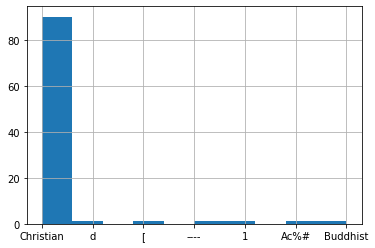

In [27]:
df['Religion'].hist()

In [48]:
df.loc[df['Religion'].isnull()]

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
18,Ricardo Rima,M,1977,Peru,NaN,Arequipa,Nurse,16.0
30,Amelia Caldwell,F,1977,Scotland,NaN,Edinburgh,Nurse,10.0
47,Erica Hudson,F,1980,Brazil,NaN,Santo André,Nurse,10.0
92,Norah Carey,F,1961,Scotland,NaN,Edinburgh,Nurse,31.0


In [19]:
# seu código com análise dos dados no atributo Religion
df.isnull().sum()

Name                   0
Sex                    6
Year of Birth          0
Country of Birth       0
Religion               4
City                   0
Profession             0
Years of Experience    9
dtype: int64

---
### Questão 3)

Dados estruturados, quando comparados aos não-estruturados, são caracterizados por:

(a) permitir executar validação dos dados, mas não possibilitar acesso direto<br>
(b) possibilitar maior liberdade/flexibilidade na coleta dos dados, sendo ideais para coleta com baixo controle<br>
(c) armazenado em arquivos de formato texto livre, permitindo controle de versões<br>
(d) possuir campos e atributos que permitam endereçar os dados diretamenteo<br>


d

---

### Questão 4)

Considere a base de dados disponível em `TACTD-01-Base.csv`, e analise os dados no atributo 'Years of experience' por meio do gráfico de caixa e depois visualizando as linhas contendo outliers mostrados no gráfico de caixa.

O atributo possui:

(a) 3 outliers globais<br>
(b) 1 outlier, pois os outros dados são plausíveis<br>
(c) 3 outliers globais, sendo dois desses também outliers contextuais<br>
(d) 3 outliers contextuais, sendo um deles também um outlier global<br>

In [38]:
#outliers contextuais pois anos de experiencia + nascimento ultrapassa 2021
df[(df['Year of Birth']+df['Years of Experience'])>2021]

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
1,Ivo Izidro,M,1983,Mexico,Christian,Acapulco,Nurse,52.0
8,Lora Lemoine,F,1976,England,Christian,Birmingham,Nurse,46.0
71,Zachary Yates,M,2010,D3,Ac%#,_Dh,Nurse,16.0


In [35]:
#outliers globais
df[df['Years of Experience']>40]

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
1,Ivo Izidro,M,1983,Mexico,Christian,Acapulco,Nurse,52.0
8,Lora Lemoine,F,1976,England,Christian,Birmingham,Nurse,46.0
22,Ariel Almada,F,1950,Portugal,Christian,Lisbon,Nurse,45.0


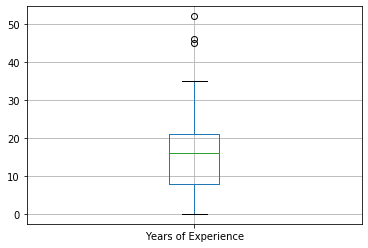

In [34]:
# seu código com análise do atributo Years of Experience
df.boxplot(column=['Years of Experience'])

## Questão 5)

Gere o gráfico de caixa do atributo 'Year of Birth' e depois selecione e imprima na tela todas as linhas em que o atributo 'Year of Birth' possui valores fora das barras de mínimo e máximo do gráfico de caixa.

Como interpretar as linhas retornadas e quais ações são mais indicadas, em termos de manter ou remover os dados supeitos?

(a) a linha 15 e a linha 71 possuem outliers e dados errôneos, ambas devem ser removidas por completo.<br>
(b) a linha 15 possui valores considerados outliers, mas são plausíveis e podem ser mantidos; a linha 71 possui outliers e dados errôneos e deve ser removida<br>
(c) a linha 22 possui outliers e atributos com dados errôneos, com valores que devem ser removidos; a linha 71 possui um outlier, mas é plausível e pode ser mantido<br>
(d) a linha 15 e a linha 71 possuem valores outliers, mas podem ser mantidos pois não há outros problemas que exigam limpeza<br>


In [45]:
df[22:23]

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
22,Ariel Almada,F,1950,Portugal,Christian,Lisbon,Nurse,45.0


In [39]:
df[(df['Year of Birth' ]>1990)|(df['Year of Birth' ]<1950)]

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
15,Vinicius Vitorio,M,1940,Brazil,Christian,São Paulo,Nurse,35.0
71,Zachary Yates,M,2010,D3,Ac%#,_Dh,Nurse,16.0


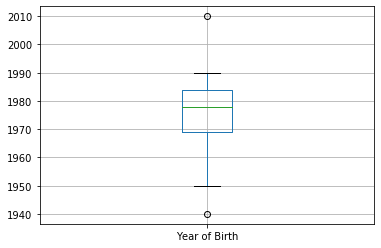

In [36]:
# seu código com análise do atributo "Year of Birth"
df.boxplot(column=['Year of Birth' ])